# Рынок заведений общественного питания Москвы

Бизнесмен решил открыть небольшое кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. Проект многообещающий, но дорогой. Вместе с партнёрами он решился обратиться к инвесторам. Их интересует текущее положение дел на рынке — сможет ли он снискать популярность на долгое время, когда все зеваки насмотрятся на роботов-официантов?

**Цель исследования** - подготовить исследование рынка. Имеются открытые данные о заведениях общественного питания в Москве.

**Ход исследования**

Исследование пройдет в 5 этапов:

1. Обзор данных;
2. Предобработка данных;
3. Анализ данных;
4. Презентация;
5. Вывод.

## Шаг 1. Обзор данных

Импортируем необходимые библиотеки.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from matplotlib import pyplot as plt

Читаем файл `rest_data.csv` и сохраняем его в переменную `rest_data`.

In [2]:
try: 
    rest_data = pd.read_csv('/datasets/rest_data.csv')
except: 
    rest_data = pd.read_csv('rest_data.csv')

Выводим на экран первые 10 строк таблицы `rest_data.csv`, а также общую информацию о таблице:

In [3]:
rest_data.head(10)

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
5,27429,СТОЛ. ПРИ ГОУ СОШ № 1051,нет,столовая,"город Москва, Абрамцевская улица, дом 15, корп...",240
6,148815,Брусника,да,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10
7,20957,Буфет МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",90
8,20958,КПФ СЕМЬЯ-1,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",150
9,28858,Столовая МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",120


In [4]:
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


В таблице 6 столбцов. Согласно  документации к данным:
* `id` — идентификатор объекта;
* `object_name` — название объекта общественного питания;
* `chain` — сетевой ресторан;
* `object_type` — тип объекта общественного питания;
* `address` — адрес;
* `number` — количество посадочных мест.

В данных ошибок не замечено. Однако на следующем шаге стоит проверить данные на дубликаты. 

## Шаг 2. Предобработка данных

Для качества анализа данные необходимо проверить на дубликаты. Сначала займемся явными дубликатами.

In [5]:
rest_data.duplicated().sum()

0

Явных дубликатов нет, теперь проверим наличие неявных дубликатов. Для этого выведем уникальные значения столбцов.

In [6]:
rest_data['chain'].unique()

array(['нет', 'да'], dtype=object)

In [7]:
rest_data['object_type'].unique()

array(['кафе', 'столовая', 'закусочная',
       'предприятие быстрого обслуживания', 'ресторан', 'кафетерий',
       'буфет', 'бар', 'магазин (отдел кулинарии)'], dtype=object)

Неявных дубликатов так же нет, так как нет повторяющихся значений.

**Вывод**

На этапе предобработки данные были проверены на дубликаты. Их не оказалось, следовательно, можно приступить к следующему шагу.

## Шаг 3. Анализ данных

Исследуем соотношение видов объектов общественного питания по количеству. 

Text(0, 0.5, 'Количество')

<Figure size 1080x288 with 0 Axes>

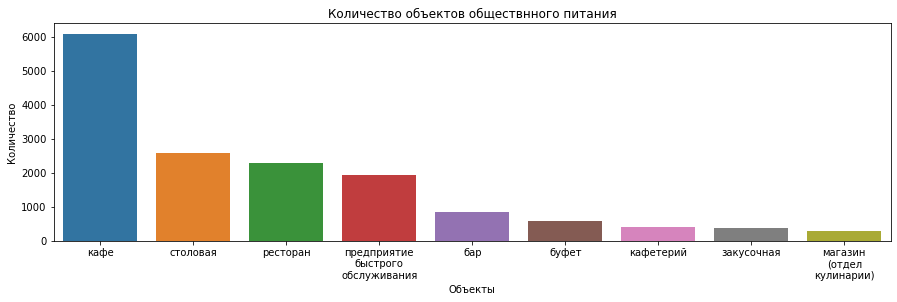

In [8]:
plt.figure(figsize=(15,4))

data_demo = rest_data.groupby('object_type')\
                     .agg(count=('number','count'))\
                     .reset_index()\
                     .sort_values(by='count', ascending=False)

data_demo['object_type'] = data_demo['object_type'].apply(lambda x : '\n'.join(x.split()))
plt.figure(figsize=(15,4))
sns.barplot(data=data_demo, x='object_type', y='count')
plt.title('Количество объектов обществнного питания')
plt.xlabel('Объекты')
plt.ylabel('Количество')

Самые распространенные объекты - кафе, столовые и рестораны.

Исследуем соотношение сетевых и несетевых заведений по количеству. 

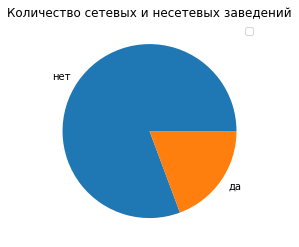

In [9]:

rest_data['chain'].value_counts().plot.pie()

plt.title('Количество сетевых и несетевых заведений')
plt.rcParams['figure.facecolor'] = '#f8f6f2'
plt.xlabel('')
plt.ylabel('')
plt.legend('')
plt.show()

Количество несетевых заведений превышает количество сетевых.

Посмотрим для какого вида объекта общественного питания характерно сетевое распространение.

In [10]:
rest_data.groupby('object_type').agg({'chain' : lambda x : (x == 'да').mean()}).sort_values(by='chain', ascending=False)


,chain
object_type,
предприятие быстрого обслуживания,0.411336
магазин (отдел кулинарии),0.285714
ресторан,0.238074
кафе,0.228890
закусочная,0.155556
кафетерий,0.130653
бар,0.043224
буфет,0.018803
столовая,0.001160


Больше всего сетевое распространение характерно для предприятий быстрого обслуживания.

Проанализируем характеристики сетевых заведений.

In [11]:
parameter = rest_data.query('chain == "да"').groupby('object_name').agg({'id':  'count', 'number': 'median'}).reset_index()
parameter

,object_name,id,number
0,Beverly Hills Diner,1,88.0
1,Bierloga,1,75.0
2,Black & White,1,40.0
3,Bocconcino,3,68.0
4,BooBo,1,46.0
...,...,...,...
719,кафе «Папа Джонс»,1,24.0
720,кафе «Старбакс»,2,63.5
721,кафе «Шоколадница»,1,50.0
722,ресторан «Брудер»,1,86.0


Сети, состоящие из 1 заведения тут можно отбросить, они возникают в основном из-за разного написания названий. 
За большое количество посадочных мест и завдений в сети примем  значения, которые больше медианы. 

In [12]:
parameter.query('id > 1').median()

/var/folders/4g/21q824kx4hlb56q2kdg1lf180000gn/T/ipykernel_12381/3645819271.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  parameter.query('id > 1').median()


id         3.0
number    42.5
dtype: float64

Разобьем сети на 4 группы и посмотрим, в какой группе больше всего сетей. 

In [13]:
#количество сетей с небольшим числом посадочных мест и небольшим числом заведений в сети

parameter.query('id <= 3 and number <= 42').count() 

object_name    282
id             282
number         282
dtype: int64

In [14]:
#количество сетей с большим числом посадочных мест и небольшим числом заведений в сети

parameter.query('id <= 3 and number > 42').count() 

object_name    311
id             311
number         311
dtype: int64

In [15]:
#количество сетей с небольшим числом посадочных мест и большим числом заведений в сети

parameter.query('id > 3 and number <= 42').count() 

object_name    69
id             69
number         69
dtype: int64

In [16]:
parameter.query('id > 3 and number > 42').count() 

object_name    62
id             62
number         62
dtype: int64

Следовательно, если взять случайную сеть, то вероятность встретить сеть с большим числом посадочных мест и небольшим числом заведений в сети больше.
Проанализируем какой вид предоставляет в среднем самое большое количество посадочных мест.

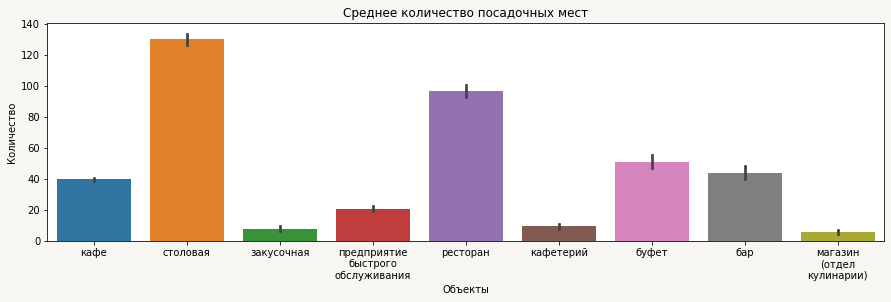

In [17]:
plt.figure(figsize=(15,4))
sns.barplot(data=rest_data, x='object_type', y='number')

plt.title('Среднее количество посадочных мест')
plt.xlabel('Объекты')
plt.ylabel('Количество')
plt.rcParams['figure.facecolor'] = '#f8f6f2'

old_ticks, old_labels = plt.xticks()
plt.xticks(old_ticks, ['\n'.join(label.get_text().split()) for label in old_labels])


plt.show()

В среднем самое большое количество посадочных мест в столовых и ресторанах.

Выделим в отдельный столбец информацию об улице из столбца `address`.

In [18]:
street_types = ['улица', 'переулок', 'проспект', 'проезд', 'линия', 'бульвар', 'шоссе', 'тракт', 'магистраль', 'набережная']

def rest_row(row):
    for address_part in row['address'].split(','):
        for t in street_types:
            if t in address_part:
                return address_part
 
rest_data['street'] = rest_data.apply(rest_row, axis = 1) 

rest_data #проверяем результат


,id,object_name,chain,object_type,address,number,street
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица
...,...,...,...,...,...,...,...
15361,208537,Шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50,3-й Крутицкий переулок
15362,209264,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10,улица Земляной Вал
15363,209186,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20,улица Земляной Вал
15364,221900,Шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36,Киевское шоссе


Построим график топ-10 улиц по количеству объектов общественного питания.

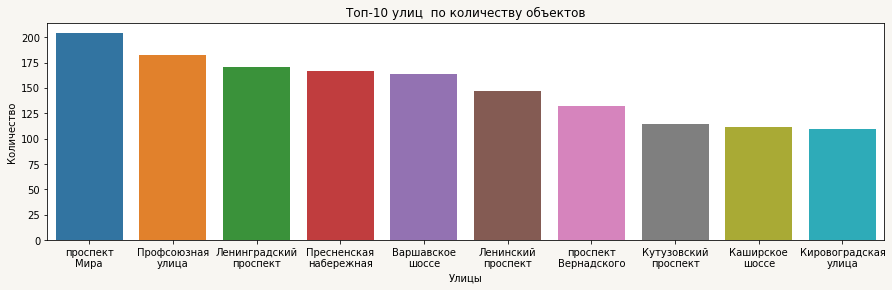

In [21]:
best_street = (
    rest_data.groupby('street')
    .agg({'id':  'count',  'number': 'sum'})
    .rename(columns={"id": "count", "number": "median"})
    .sort_values(by='count', ascending=False)
    .reset_index()
    .head(10)
)

fig = plt.figure(figsize=(15,4))
sns.barplot(data=best_street, x='street', y='count')
plt.rcParams['figure.facecolor'] = '#f8f6f2'
plt.title('Топ-10 улиц  по количеству объектов')
plt.xlabel('Улицы')
plt.ylabel('Количество')

old_ticks, old_labels = plt.xticks()
plt.xticks(old_ticks, ['\n'.join(label.get_text().split()) for label in old_labels])

plt.show()

Отобразим все районы, через которые проходит каждая улица:
* `Проспект Мира` - Алексеевский район, Ярославский Район, Район Марьина роща, Останкинский район, Район Ростокино, Район Свиблово
* `Профсоюзная улица` - Академический район, Район Черемушки, Район Ясенево, Район Коньково, Обручевский район, Район Теплый Стан
* `Ленинградский проспект` - Район Аэропорт, Район Беговой, Хорошевский район, Район Сокол
* `Варшавское шоссе` - Район Чертаново Центральное, Район Чертаново Северное, Район Чертаново Южное, Донской район, Район Нагатино-Садовники, Нагорный район, Район Северное Бутово, Район Южное Бутово
* `Ленинский проспект` - Район Проспект Вернадского, Район Тропарево-Никулино, Донской район, Район Гагаринский, Ломоносовский район, Обручевский район, Район Теплый Стан, Район Якиманка
* `Проспект Вернадского` - Район Проспект Вернадского, Район Раменки, Район Тропарево-Никулино, Район Гагаринский, Ломоносовский район
* `Кутузовский проспект` - Район Дорогомилово, Район Фили-Давыдково
* `Каширское шоссе` - Район Москворечье-Сабурово, Район Нагатино-Садовники, Район Орехово-Борисово Южное, Район Орехово-Борисово Северное
* `Кировоградская улица` - Район Чертаново Центральное, Район Чертаново Северное, Район Чертаново Южное
* `Ходынский бульвар` - Хорошевский район

Самые распространенные районы - Чертаново, Гагаринский, Донской.

Найдем районы с одним объектом общественного питания. 

In [22]:
sheet_id = "15Ov5Pgyp0Mx_YRos6ysnwxiyNTNXcl4mVurZYbr8UrU"
sheet_name = "data-4275-2022-05-101"
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"

data_districts = pd.read_csv(url).rename(columns={'District' : 'district', 'AdmArea' : 'adm_area', 'Address' : 'address'})[['district','adm_area','address']].drop_duplicates()

one_object_sreet = rest_data.groupby('street').agg(id=('id','count'))
one_object_sreet = one_object_sreet[one_object_sreet['id'] == 1]

data_demo = rest_data[rest_data['street'].isin(one_object_sreet.index)].merge(data_districts, on='address')

data_demo

,id,object_name,chain,object_type,address,number,street,district,adm_area
0,153644,Американская Лаборатория Десертов,нет,кафе,"город Москва, Филипповский переулок, дом 15/5",20,Филипповский переулок,район Арбат,Центральный административный округ
1,22139,ХуанХэ,нет,ресторан,"город Москва, 1-й Балтийский переулок, дом 3/25",60,1-й Балтийский переулок,район Аэропорт,Северный административный округ
2,25833,АЗЕРБАЙДЖАН,нет,ресторан,"город Москва, улица Демьяна Бедного, дом 4",180,улица Демьяна Бедного,район Хорошёво-Мнёвники,Северо-Западный административный округ
3,24646,Угол,нет,кафе,"город Москва, Верхняя улица, дом 3, корпус 2",71,Верхняя улица,район Беговой,Северный административный округ
4,20632,БАР В ФИТНЕС КЛУБЕ,нет,бар,"город Москва, Глазовский переулок, дом 5",4,Глазовский переулок,район Хамовники,Центральный административный округ
...,...,...,...,...,...,...,...,...,...
350,208805,Кафе,нет,кафе,"город Москва, 3-й Угрешский проезд, дом 8, стр...",15,3-й Угрешский проезд,район Печатники,Юго-Восточный административный округ
351,211368,Пацио Пицца,нет,кафе,"город Москва, улица Линии Октябрьской Железной...",20,улица Линии Октябрьской Железной Дороги,Тимирязевский район,Северный административный округ
352,214324,Кадаши ( закрытый),нет,ресторан,"город Москва, 2-й Кадашёвский переулок, дом 16...",15,2-й Кадашёвский переулок,район Якиманка,Центральный административный округ
353,223171,Кондитерская «Пряник.Рогалик»,нет,кафе,"город Москва, город Троицк, Пионерская улица, ...",20,Пионерская улица,поселение Троицк,Троицкий административный округ


In [23]:
one_object_sreet

,id
street,
1-й Балтийский переулок,1
1-й Басманный переулок,1
1-й Ботанический проезд,1
1-й Вешняковский проезд,1
1-й Голутвинский переулок,1
...,...
улица Знаменка,1
улица Каманина,1
улица Миклухо-Маклая,1


In [24]:
one_object_sreet = (
    data_demo.groupby('district')
    .agg({'object_name':  'count'})
    .query('object_name == 1')
)
one_object_sreet.count()
one_object_sreet

,object_name
district,
Войковский район,1
Останкинский район,1
поселение Внуковское,1
поселение Десеновское,1
поселение Кленовское,1
поселение Сосенское,1
поселение Щаповское,1
район Бирюлёво Восточное,1
район Бирюлёво Западное,1


In [25]:
data_demo['district'].value_counts()

Таганский район        21
Пресненский район      17
Басманный район        16
район Хамовники        15
Тверской район         13
                       ..
район Восточный         1
район Гольяново         1
район Капотня           1
район Строгино          1
поселение Щаповское     1
Name: district, Length: 98, dtype: int64

Улицы с одним заведением чаще всего встречаются в Таганском, Пресненском и Басманном районах.

**Вывод**
* Самые распространенные объекты общественного питания - кафе, столовые и рестораны;
* Самое большое количество посадочных мест в столовых и ресторанах;
* Количество несетевых заведений превышает количество сетевых;
* Сетевое распространение характерно для предприятий быстрого обслуживания;
* Самые распространенные районы - Чертаново, Гагаринский, Донской;
* Улицы с одним заведением чаще всего встречаются в Таганском, Пресненском и Басманном районах;
* Вероятность встретить сеть с большим числом посадочных мест и небольшим числом заведений в сети больше.

После анализа данных можно дать следующиие рекомендации для отрытия заведения: следует выбирать сетевые объекты на большим количеством посадочных мест в районах Чертаново, Гагаринский, Донской. Сетевые заведения можно развивать, добавляя новые объекты в новые части города. 

In [26]:
rest_data.merge(data_districts, on='address').groupby(['street','district']).agg(count=('id','count')).sort_values(by='count',ascending=False).head(10)

,,count
street,district,
Пресненская набережная,Пресненский район,167
Ходынский бульвар,Хорошёвский район,99
улица Новый Арбат,район Арбат,87
Кировоградская улица,район Чертаново Центральное,78
улица Ленинская Слобода,Даниловский район,78
улица Сущёвский Вал,район Марьина Роща,72
улица Покровка,Басманный район,71
Ленинградское шоссе,Войковский район,71
Пятницкая улица,район Замоскворечье,67


## Шаг 4. Презентация

Презентация: https://www.canva.com/design/DAFBIp5BGfs/KXlRlLbvPO8-Lx_kmlLoYw/view?utm_content=DAFBIp5BGfs&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton

## Общий вывод

В исследовавании стояла задача по исследованию рынка общественного питания Москвы.

Работа была разделена на 5 шагов: обзор данных, предобработка данных, анализ данных, презентация, вывод.

На этапе предобработки данные были проверены на дубликаты.

На этапе анализа данных были сделаны следующие выводы:
* Самые распространенные объекты общественного питания - кафе, столовые и рестораны;
* Самое большое количество посадочных мест в столовых и ресторанах;
* Количество несетевых заведений превышает количество сетевых;
* Сетевое распространение характерно для предприятий быстрого обслуживания;
* Самые распространенные районы - Чертаново, Гагаринский, Донской;
* Улицы с одним заведением чаще всего встречаются в Таганском, Пресненском и Басманном районах;
* Вероятность встретить сеть с большим числом посадочных мест и небольшим числом заведений в сети больше.

После анализа данных можно дать следующиие рекомендации для отрытия заведения: следует выбирать сетевые объекты на большим количеством посадочных мест в районах Чертаново, Гагаринский, Донской. Сетевые заведения можно развивать, добавляя новые объекты в новые части города. 
